# WRAP UP QUIZ

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/ames_housing_no_missing.csv"
ames_housing = pd.read_csv(url)
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

The column "SalePrice" contains the target variable.

To simplify this exercise, we only use the numerical features defined below:



In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

Start by fitting a ridge regressor (`sklearn.linear_model.Ridge`) fixing the penalty `alpha` to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument `return_estimator=True` in `sklearn.model_selection.cross_validate` to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of `sklearn.preprocessing.StandardScaler` to scale the data before passing it to the regressor.



In [3]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)
score = cv_results["test_score"]


c:\Users\npigeon1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\npigeon1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Question 1
How large is the largest absolute value of the weight (coefficient) in this trained model?

Note that the estimator fitted in each fold of the cross-validation procedure is a pipeline object. To access the coefficients of the `Ridge` model at the last position in a pipeline object, you can use the expression `pipeline[-1].coef_ `for each pipeline object fitted in the cross-validation procedure. The `-1` notation is a negative index meaning "last position".

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "mean", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-3132.330756,-124.590613,4386.005178,-5.168321e+18,-1.767595e+18,-4.938164e+18,-1.030006e+19,-3.305951e+18,-3.815637e+18,-4.366393e+17,...,1770.949263,12792.453037,-7908.548914,3631.644558,1057.336648,-5901.854532,60.244808,-2198.533358,-2980.948895,-1233.061113
mean,-69.266900,1915.548769,6754.349445,2.101260e+18,7.493625e+17,2.036938e+18,-2.036682e+18,-3.803925e+17,-4.343407e+17,-4.584994e+16,...,3710.124423,20404.919426,-1880.238088,4650.352791,2030.177990,-2565.170792,1138.142016,1011.959020,-1894.056245,-75.245258
max,2780.788333,4933.658316,10538.818753,1.064385e+19,3.803673e+18,1.030395e+19,4.967323e+18,5.390428e+18,6.086820e+18,6.939415e+17,...,7253.542064,23395.827033,4677.480186,6078.618809,2742.935325,-529.687789,2271.955189,2321.040351,349.335397,959.205638


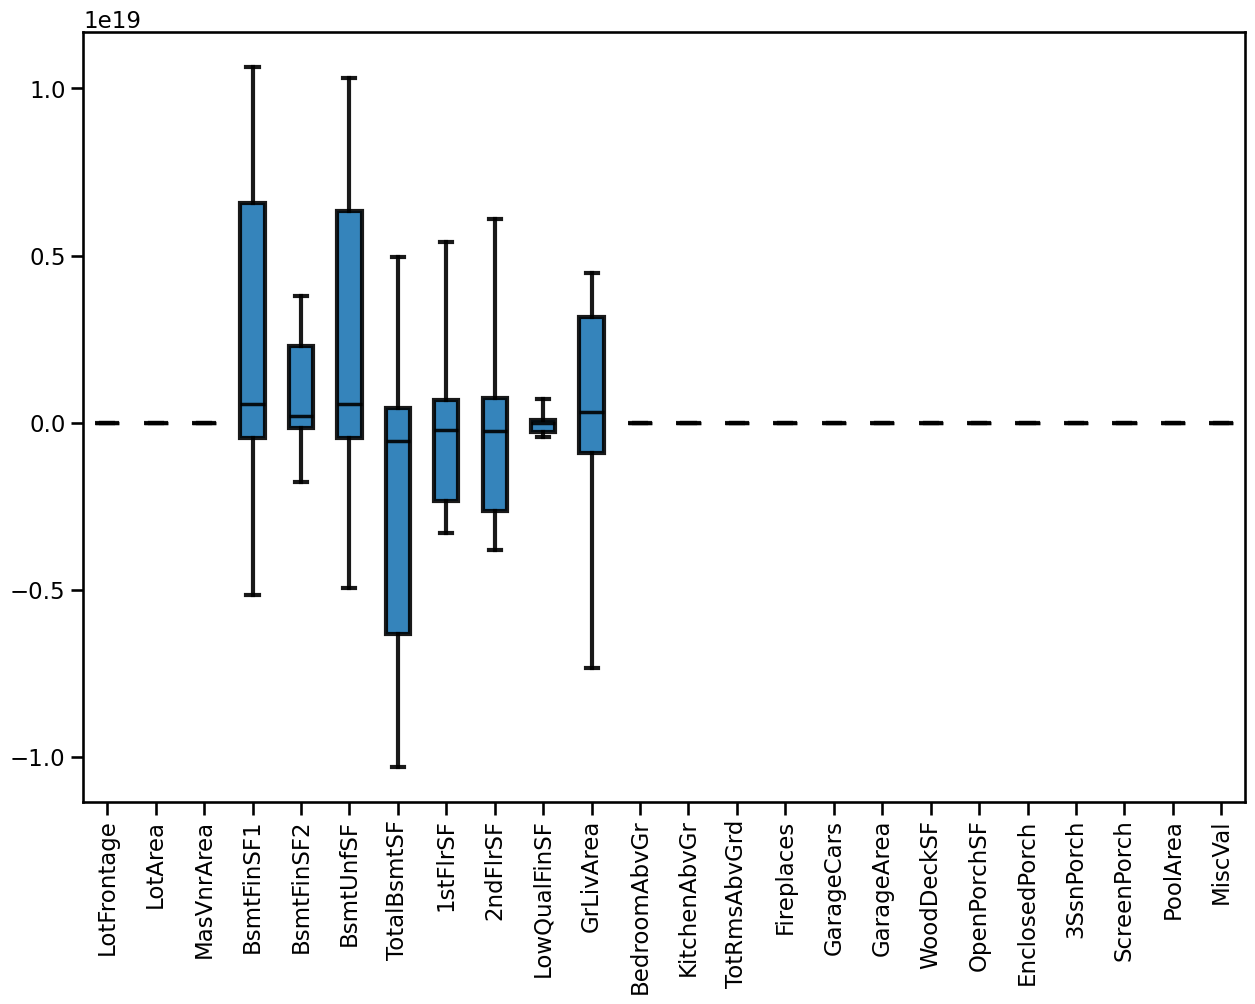

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

This plot gives us the information that some coefficients are really large (outlier dots on the plot). Notice that the scale of the y axis is huge (1e19) and the "bodies" of the boxplots are shrunk seemingly close to zero and we can only visualize the numerically unstable outliers.

## Question 2
Repeat the same experiment by fitting a ridge regressor (sklearn.linear_model.Ridge) with the default parameter (i.e. alpha=1.0).

In [6]:
model.set_params(ridge__alpha=1)
cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

In [7]:
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "mean", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.953000,740.771764,-2419.756875,-1050.602603
mean,62.008411,1508.092126,6862.664154,8574.144931,-198.540154,3078.259716,11947.838543,9701.912155,12201.988699,-1718.353818,...,3087.058747,19417.910189,-725.555479,4763.085964,2095.684415,-2735.318700,943.744522,1634.099935,-1764.633609,147.261815
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.856940,2172.624444,71.092558,607.322413


## Question 3 
What are the 2 most important features used by the ridge regressor ? You can make a box plot of the coefficients across all folds to get a good insight

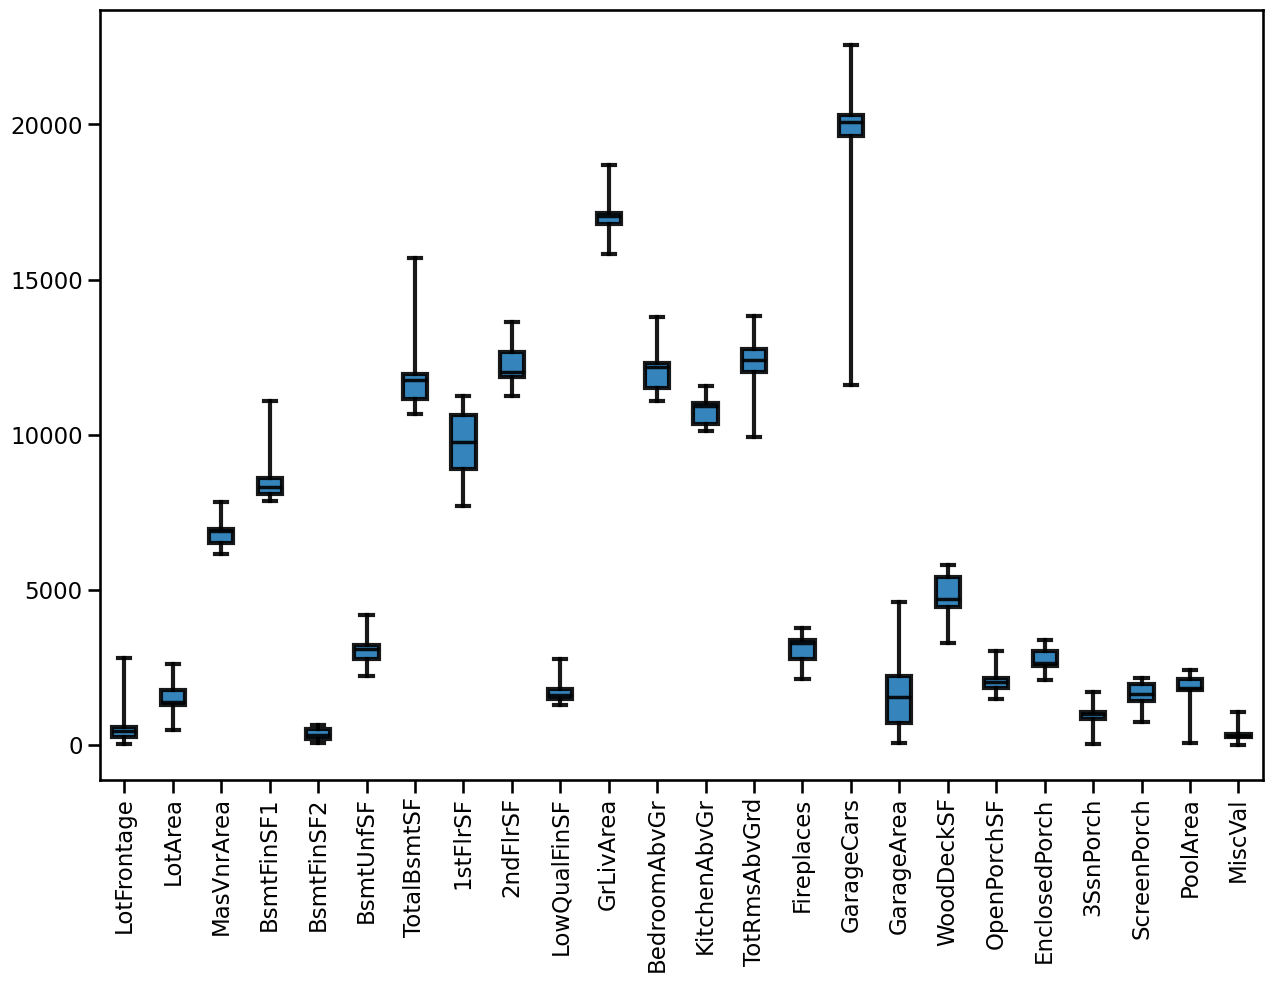

In [8]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

## Question 4
Remove the feature `"GarageArea"` from the dataset and repeat the previous experiment. What is the impact on the weights ?

In [9]:
print(coefs["GarageCars"].std())
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop)

cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
print(coefs["GarageCars"].std())

2895.2876461017604
1305.139394188688


## Question 5
What is the main reason for observing the previous impact on the most important weights? 
Both garage features are correlated and carrying similar information.

The nb of ccars that can fit in the garage is indeed strongly dependent on the area of the garage. This could be checked by computing a correlation coef (Pearson, Spearman or Kendall) between the two columns

Correlated features typically cause unstable estimation of the matching linear model coef, even with some level of regularization. As a result we can expect comparatively larger standard deviations of their coef when the two correlated features are included in the linear model.

There is no reason that the measurement of the garage area would be more noisy than most other features.

One way to check the above analysis holds would be to drop the "GarageCars" feature instead of "GarageArea" and check that the coef of "GarageArea" gets to the most important in magnitude along with a small standard deviation

## Question 6
Now, we search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a `sklearn.linear_model.RidgeCV` instead of a `Ridge` regressor on the numerical data without the `"GarageArea"` column. Pass `alphas=np.logspace(-3, 3, num=101)` to explore the effect of changing the regularization strength.

What is the effect of tuning `alpha` on the variability of the weights of the feature `"GarageCars"`? Remember that the variability can be assessed by computing the standard deviation.

In [10]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, num=101)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results_num_only = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
test_score_num_only = cv_results_num_only["test_score"]  # save it for later

coefs = [pipeline[-1].coef_ for pipeline in cv_results_num_only["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs["GarageCars"].std()

np.float64(587.547665833451)

We see that the magnitude of the standard deviation decreased slightly; it could mean that our model chose a stronger regularization parameter than the default value in `Ridge`.

## Question 7
Check the parameter `alpha_` for the different ridge regressors obtained on each fold

In [11]:
tuned_alphas = [pipeline[-1].alpha_ for pipeline in cv_results_num_only["estimator"]]
tuned_alphas

[np.float64(331.13112148259074),
 np.float64(331.13112148259074),
 np.float64(288.40315031266056),
 np.float64(331.13112148259074),
 np.float64(331.13112148259074),
 np.float64(331.13112148259074),
 np.float64(288.40315031266056),
 np.float64(331.13112148259074),
 np.float64(63.0957344480193),
 np.float64(331.13112148259074)]

## Question 8
So far we only used the list of `numerical_features` to build the predictive model. Now create a preprocessor to deal separately with the numerical and categorical columns:

- categorical features can be selected if they have an `object` data type;
- use an OneHotEncoder to encode the categorical features;
- numerical features should correspond to the `numerical_features` as defined  above. This is a subset of the features that are not an `object` data type;
- use an `StandardScaler` to scale the numerical features.
The last step of the pipeline should be a `RidgeCV` with the same set of `alphas` to evaluate as previously.

By comparing the cross-validation test scores fold-to-fold for the model with `numerical_features` only and the model with both `numerical_features` and `categorical_features`, count the number of times the simple model has a better test score than the model with all features.

A model using both numerical and categorical features is better than a model using only numerical features for 10 CV iterations out of 10.


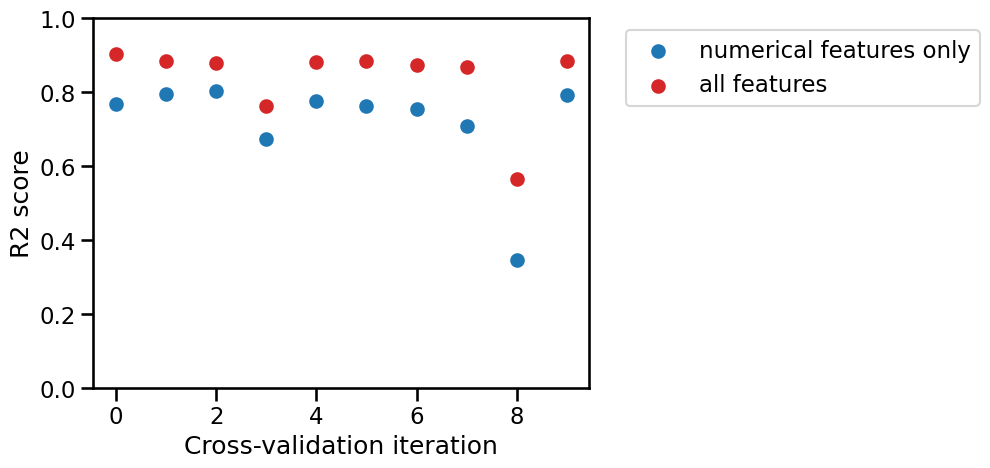

In [12]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = selector(dtype_include=object)(data)
numerical_features.remove("GarageArea")

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (StandardScaler(), numerical_features),
)
model = make_pipeline(preprocessor, RidgeCV(alphas=alphas))
cv_results_num_and_cat = cross_validate(
    model, data, target, cv=10, n_jobs=2
)
test_score_num_and_cat = cv_results_num_and_cat["test_score"]

indices = np.arange(len(test_score_num_only))
plt.scatter(
    indices,
    test_score_num_only,
    color="tab:blue",
    label="numerical features only"
)
plt.scatter(
    indices,
    test_score_num_and_cat,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("R2 score")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using both numerical and categorical features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_num_and_cat > test_score_num_only)} CV iterations out of 10."
)

In this Module we saw that non-linear feature engineering may yield a more predictive pipeline, as long as we take care of adjusting the regularization to avoid overfitting.

Try this approach by building a new pipeline similar to the previous one but replacing the `StandardScaler` by a `SplineTransformer` (with default hyperparameter values) to better model the non-linear influence of the numerical features.

Furthermore, let the new pipeline model feature interactions by adding a new `Nystroem` step between the preprocessor and the `RidgeCV` estimator. Set `kernel="poly", degree=2` and `n_components=300 `for this new feature engineering step.

## Question 9
By comparing the cross-validation test scores fold-to-fold for the model with both `numerical_features` and `categorical_features`, and the model that performs non-linear feature engineering; count the number of times the non-linear pipeline has a better test score than the model with simpler preprocessing.

A model using all features with non-linear feature engineering is better  than the previous pipeline for 8 CV iterations out of 10.


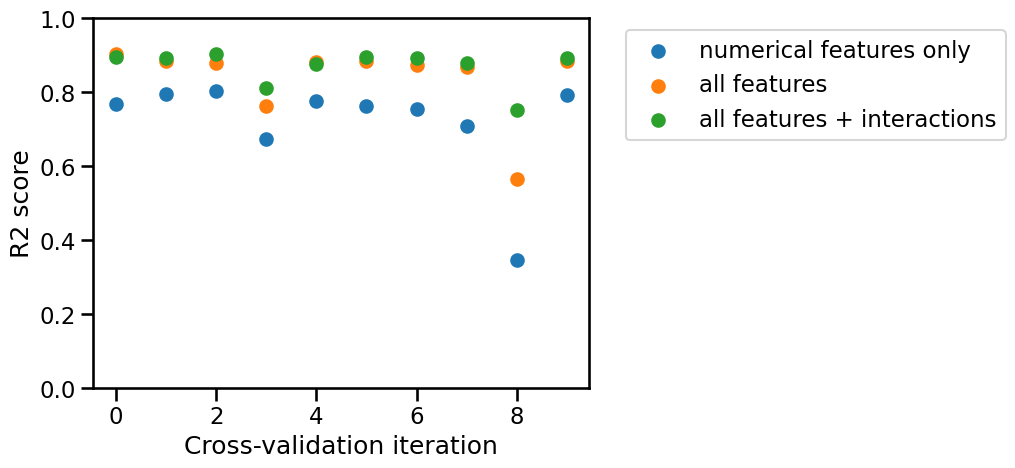

In [18]:
from sklearn.preprocessing import SplineTransformer
from sklearn.kernel_approximation import Nystroem

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (SplineTransformer(), numerical_features)
)

model_with_interaction  = make_pipeline(preprocessor,
                                Nystroem(kernel = "poly", degree = 2, n_components=300),
                                RidgeCV(alphas=alphas))

cv_results_interactions  = cross_validate(model_with_interaction , data, target, cv=10, n_jobs=2)
test_score_interactions  = cv_results_interactions ["test_score"]

plt.scatter(
    indices, 
    test_score_num_only, 
    label="numerical features only",
)
plt.scatter(
    indices, 
    test_score_num_and_cat,
    label="all features",
)
plt.scatter(
    indices, 
    test_score_interactions,
    label="all features + interactions",
)
plt.ylim((0,1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("R2 score")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using all features with non-linear feature engineering is better"
    "  than the previous pipeline for"
    f" {sum(test_score_interactions > test_score_num_and_cat)} CV iterations"
    " out of 10."
)

Notice that `Nystroem` is a randomized preprocessing step. Therefore the results might vary a bit when rerunning the cross-validation of the pipeline if the `random_state` is not specified. However, this should not change the solution to the quiz question because the model with interactions is indeed significantly better. Confirm this by reloading the previous cells several times.

Alternatively we could have used an explicit polynomial expansion such as` PolynomialFeatures(degree=2, interactions_only=True)` to model interactions between features instead of using the `Nystroem(kernel="poly", degree=2, n_components=300)` approximation above.

However the `PolynomialFeatures` would generate significantly more intermediate features than the fixed 300 features of `Nystroem` for this dataset: this would make the pipeline really slow to execute, use much more memory and possibly overfit more in the end.